In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os

from PIL import Image
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

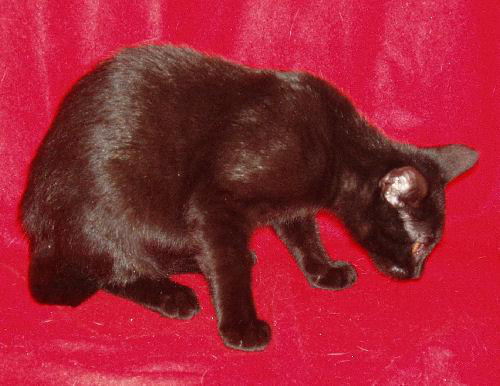

In [3]:
with Image.open('../Data/CATS_DOGS/CATS_DOGS/test/CAT/10010.jpg') as im:
    display(im)

## Creating a list of image file-names

In [4]:
path = '..\\Data\\CATS_DOGS\\'
img_names = []

for folder, subfolders, filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder+'\\'+img)
        
print('Images: ',len(img_names))

Images:  24994


## Creating a DataFrame that will have the sizes of the images

We are creating DataFrame for the sizez because we want to do statistical analysis on it. It will help us in transforming images because we want all our images in one size when working with the model.

In [5]:
# Start by creating a list
img_sizes = []
rejected = []

for item in img_names:
    try:
        with Image.open(item) as img:
            img_sizes.append(img.size)
    except:
        rejected.append(item)
        
print(f'Images:  {len(img_sizes)}')
print(f'Rejects: {len(rejected)}')

Images:  24994
Rejects: 0


In [6]:
df = pd.DataFrame(img_sizes)

In [7]:
df.head()

0    1
0  431  360
1  500  375
2  500  471
3  500  375
4  320  240

In [8]:
df.describe()

0             1
count  24994.000000  24994.000000
mean     404.493518    361.037129
std      108.941802     96.936811
min       42.000000     33.000000
25%      323.000000    302.000000
50%      448.000000    375.000000
75%      500.000000    421.000000
max      500.000000    500.000000

## Now we will be transformations on the images

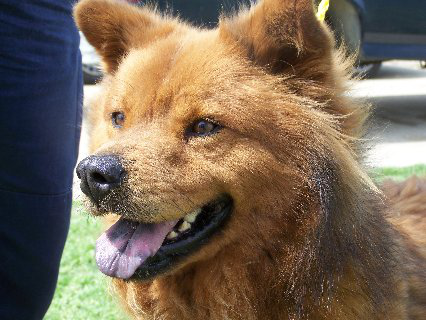

(426, 320)


In [23]:
dog = Image.open('../Data/CATS_DOGS/CATS_DOGS/train/DOG/45.jpg')

display(dog)
print(dog.size)

This is how jupyter display an image and the size is as (WIDTH and HEIGHT).

#   Now lets do some transformation on the images

In [28]:
## Using (Copose) because we will do multiple transformation. For only one transformation we can directly use just transform
transform = transforms.Compose([
    transforms.ToTensor()
])

im =  transform(dog)

print(im.shape)
type(im)

torch.Size([3, 320, 426])


torch.Tensor

We can't show the image directly after it is conveted into a tensor we have to reshape it.


plt.imshow(im)  ---> directly doing this will cause a diention error. Current shape is (3 ,320, 426) after changes ---> (320, 426, 3)

(320, 426, 3)


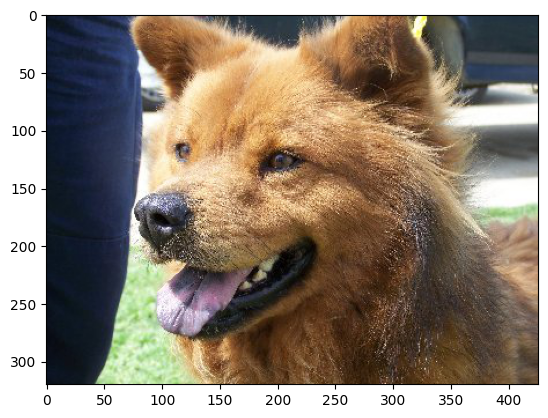

In [36]:
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));
print(np.transpose(im.numpy(), (1, 2, 0)).shape)

torch.Size([3, 224, 298])


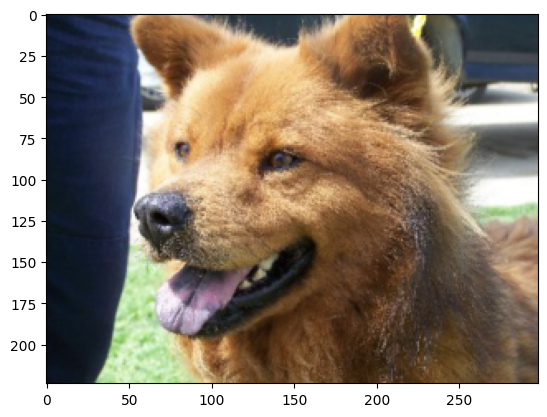

In [37]:
transform = transforms.Compose([
    transforms.Resize(224), 
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

(135, 102)


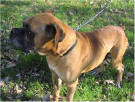

In [43]:
small_dog = Image.open('../Data/CATS_DOGS/CATS_DOGS/train/DOG/11.jpg')
print(small_dog.size)
display(small_dog)

##  We resized all the images so they all have same shape

torch.Size([3, 224, 296])


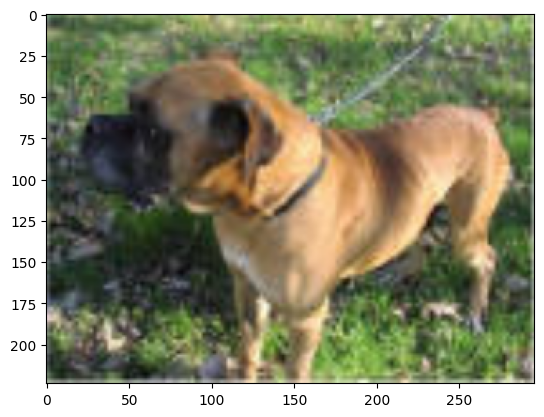

In [44]:
im = transform(small_dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

torch.Size([3, 224, 224])


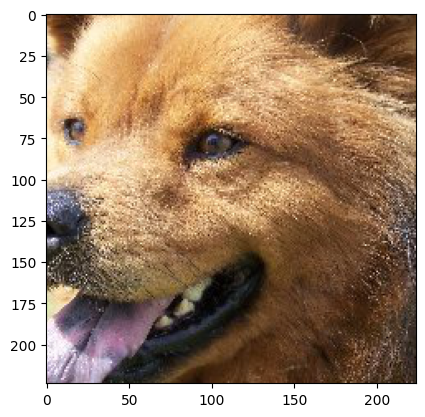

In [45]:
transform = transforms.Compose([
    transforms.CenterCrop(224), 
    transforms.ToTensor()
])
im = transform(dog) # this crops the original image
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

# It is better to resize then crop

torch.Size([3, 224, 224])


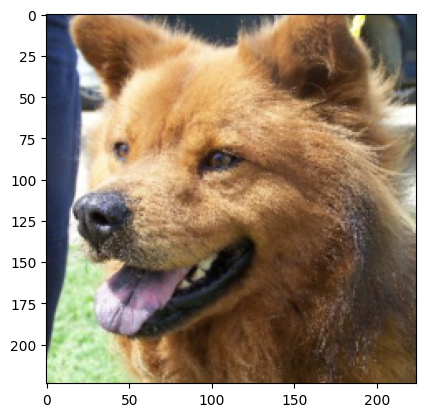

In [46]:
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224), 
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

torch.Size([3, 320, 426])


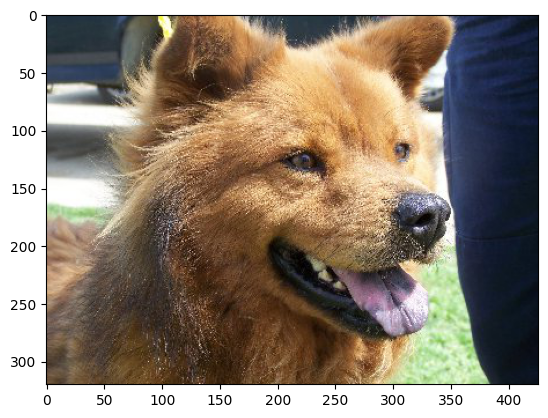

In [47]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),  # normally we'd set p=0.5
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

torch.Size([3, 320, 426])


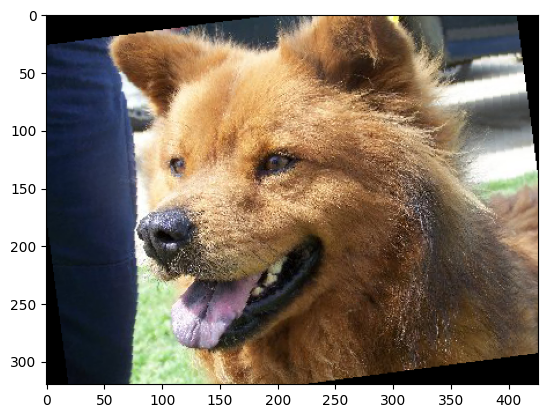

In [48]:
transform = transforms.Compose([
    transforms.RandomRotation(30),  # rotate randomly between +/- 30 degrees
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

torch.Size([3, 224, 224])


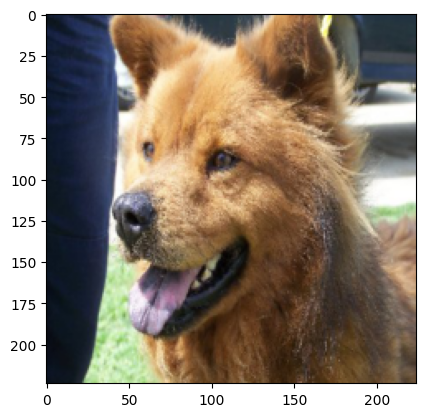

In [49]:
transform = transforms.Compose([
    transforms.Resize((224,224)),  # be sure to pass in a list or a tuple
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

# Putting all together

torch.Size([3, 224, 224])


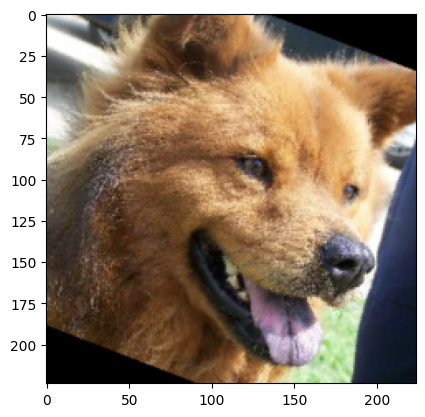

In [50]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),  # normally we'd set p=0.5
    transforms.RandomRotation(30),
    transforms.Resize(224),
    transforms.CenterCrop(224), 
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));